In [10]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.utils import plot_model

In [2]:
# 定义最大词汇数
max_words = 10000
# 定义最长句子，即句子词汇数量
maxlen = 400
batch_size = 128
# 定义词向量长度
embedding_dims = 128
epochs = 5
# 定义滤波器数量
filters = 64
# 卷积核大小
kernel_size = 3

In [4]:
# 加载数据集，只保留频率最高的前max_words个词
# 其中，出现频率越高编号越小     0 -> padding  1 -> <start>   2 -> OOV（Out-of-vocabulary）  3 -> 预留
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
# 查看测试集第0个句子
print(x_test[0])

[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]


In [6]:
# 获得数据集字典   key->英语词汇  value->编号
# 需要注意的是，数据集中的编号-3才能得到这个字典的编号
word2id = imdb.get_word_index()

id2word = dict([(value + 3, key) for (key, value) in word2id.items()])

# 设置预留字符
id2word[3] = '[RESERVE]'
# 设置Out-of-vocabulary字符
id2word[2] = '[OOV]'
# 设置起始字符
id2word[1] = '[START]'
# 设置填充字符
id2word[0] = '[PAD]'

decoded_review = ' '.join([id2word.get(i, '?') for i in x_test[0]])
print(decoded_review)

[START] please give this one a miss br br [OOV] [OOV] and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite [OOV] so all you madison fans give this a miss


In [7]:
# 序列填充，因为模型结构是固定的而句子的长度是不固定的，所以我们需要把句子变成相同的长度
# 如果句子长度不足 maxlen，则把句子填充到 maxlen 的长度(前填充)，如果句子长度超过 maxlen，则取句子前 maxlen 个词
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print(f'x_train.shape:{x_train.shape}')
print(f'x_test.shape:{x_test.shape}')
print(x_test[0])

x_train.shape:(25000, 400)
x_test.shape:(25000, 400)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    

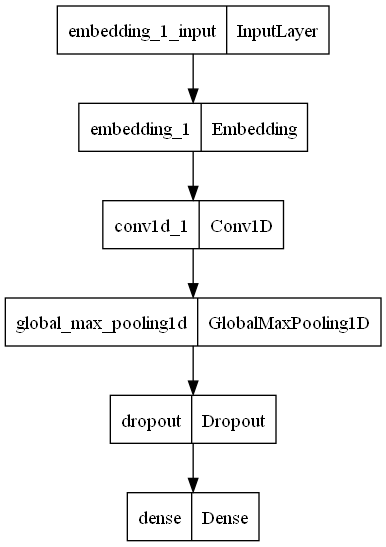

In [11]:
# 构建模型
model = Sequential()
# Embedding 是一个权值矩阵，包含所有词汇的词向量，Embedding 的行数等于词汇数，列数等于词向量长度
# Embedding 的作用是获得每个词对应的词向量，这里的词向量是没有经过预训练的随机值，会跟随模型一起训练
# max_words 词汇数，embedding_dims 词向量长度
# 模型训练时数据输入为(batch, maxlen)
model.add(Embedding(max_words,embedding_dims))
# 设置一个一维卷积
model.add(Conv1D(filters,kernel_size,strides=1,padding='same',activation='relu'))
# 卷积计算后得到的数据为(batch, maxlen, filters)
# GlobalMaxPooling1D-全局最大池化计算每一张特征图的最大值
# 池化后得到(batch, filters)
model.add(GlobalMaxPooling1D())
# 加上 Dropout
model.add(Dropout(0.5))
# 最后 2 分类，设置 2 个神经元
model.add(Dense(2,activation='softmax'))
# 画图
plot_model(model)

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


In [13]:
# 训练模型
model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test))

Epoch 1/5
196/196 [==============================] - 9s 11ms/step - loss: 0.5415 - accuracy: 0.7174 - val_loss: 0.3703 - val_accuracy: 0.8403
Epoch 2/5
196/196 [==============================] - 2s 11ms/step - loss: 0.3498 - accuracy: 0.8498 - val_loss: 0.3046 - val_accuracy: 0.8742
Epoch 3/5
196/196 [==============================] - 2s 10ms/step - loss: 0.2689 - accuracy: 0.8916 - val_loss: 0.2875 - val_accuracy: 0.8780
Epoch 4/5
196/196 [==============================] - 2s 10ms/step - loss: 0.2022 - accuracy: 0.9270 - val_loss: 0.2934 - val_accuracy: 0.8762
Epoch 5/5
196/196 [==============================] - 2s 11ms/step - loss: 0.1555 - accuracy: 0.9454 - val_loss: 0.3077 - val_accuracy: 0.8742
